# Dalyell Group Week 5 Assignment
##The MNIST fashion dataset

Due: 13/09/2019

How to submit: after you finish working, save and download the document as a `.ipynb` file (File - Download .ipynb). Send through the `.ipynb` file. All cells are expected to run without errors. 

Data source: [MNIST Fashion dataset](https://github.com/zalandoresearch/fashion-mnist). 

To download the data:


In [1]:
! wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
! wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
! wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
! wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

--2019-09-09 07:02:14--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.74.23
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.74.23|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]  25.20M  16.9MB/s    in 1.5s    

2019-09-09 07:02:15 (16.9 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [26421880/26421880]

--2019-09-09 07:02:17--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.74.23
Connecting to fashion-mnist.s3-website.eu-central-1.amazona

In [0]:
import os
import gzip
import numpy as np
import keras

def load_mnist(path, kind='train'):

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels


In [0]:
# It will override the MNIST data
# Rename if you want
x_train, y_train = load_mnist('.', 'train')
x_test, y_test = load_mnist('.', 't10k')

In [56]:
# inspect training data dim
print("x_train dim is" + str(x_train.shape))
print("y_train dim is" + str(y_train.shape))

# inspect test data dim
print("x_test dim is" + str(x_test.shape))
print("y_test dim is" + str(y_test.shape))

print(x_train)

x_train dim is(60000, 784)
y_train dim is(60000,)
x_test dim is(10000, 784)
y_test dim is(10000,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [0]:
x_train = x_train.reshape(60000, 28, 28, 1)

x_test = x_test.reshape(10000, 28, 28,1)

In [58]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


(28, 28)


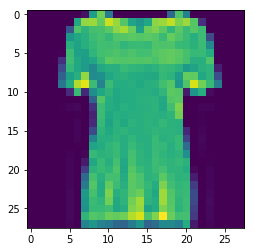

In [59]:
# Import the module
from matplotlib import pyplot as plt

# Let's pick the first image (indicated by the first zero)
img = x_train[10, :,:,0]

# Have a look at the image dimension (should match with 28 x 28)
print(img.shape)

# Plot the image
plt.imshow(img)

In [0]:
# Normalise the data (so that they lie between 0 and 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [64]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test
                                   )
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [65]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [0]:
# Define the deep learning structure

# Initialise the model, it's empty at the beginning
model = keras.models.Sequential()

# Add the first convolutional layer
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), 
                              activation='relu', input_shape=(28, 28, 1)))
# Add the first pooling layer
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
# Similarly the second convolutional layer
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
# The second pooling layer
model.add(keras.layers.MaxPooling2D((2,2)))

# Flatten the image (pulled into an array)
model.add(keras.layers.Flatten())
# Feed the array into a densely-connected neural network
model.add(keras.layers.Dense(128, activation='relu'))
# Use the softmax to map the output to probabilities
model.add(keras.layers.Dense(10, activation='softmax'))

In [0]:
# Configure the training details, e.g. what optimiser to use
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])

In [68]:
# Fit the model. The loss and accuracy will be outputed by default.
history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/10
60000/60000 [==============================] - 47s 780us/step - loss: 0.6061 - acc: 0.7792
Epoch 2/10
60000/60000 [==============================] - 46s 760us/step - loss: 0.3682 - acc: 0.8664
Epoch 3/10
60000/60000 [==============================] - 45s 757us/step - loss: 0.3155 - acc: 0.8835
Epoch 4/10
60000/60000 [==============================] - 46s 760us/step - loss: 0.2834 - acc: 0.8970
Epoch 5/10
60000/60000 [==============================] - 46s 761us/step - loss: 0.2581 - acc: 0.9054
Epoch 6/10
60000/60000 [==============================] - 45s 758us/step - loss: 0.2383 - acc: 0.9118
Epoch 7/10
60000/60000 [==============================] - 46s 763us/step - loss: 0.2203 - acc: 0.9186
Epoch 8/10
60000/60000 [==============================] - 46s 767us/step - loss: 0.2048 - acc: 0.9247
Epoch 9/10
60000/60000 [==============================] - 46s 772us/step - loss: 0.1919 -

In [69]:
# Evaluate the performance
performance = model.evaluate(x_test, y_test)
print('The loss is %.3f and the accuracy is %.3f on the test data' 
      % tuple(performance))

10000/10000 [==============================] - 3s 287us/step
The loss is 0.253 and the accuracy is 0.909 on the test data
